In [13]:
#acerage and median length of each sentiment category , plot histogram

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('poem_data.csv')

In [6]:
df.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [16]:
#calculate length
df['length']= df['Poem'].apply (lambda x: len(str(x).split()))

In [17]:
stats = df.groupby('Genre')['length'].agg(['mean','median'])
#Group by genre and computed mean and median

print(stats)

                  mean  median
Genre                         
Affection    48.224066    50.0
Death        47.785425    50.0
Environment  44.337302    50.0
Music        46.059761    50.0


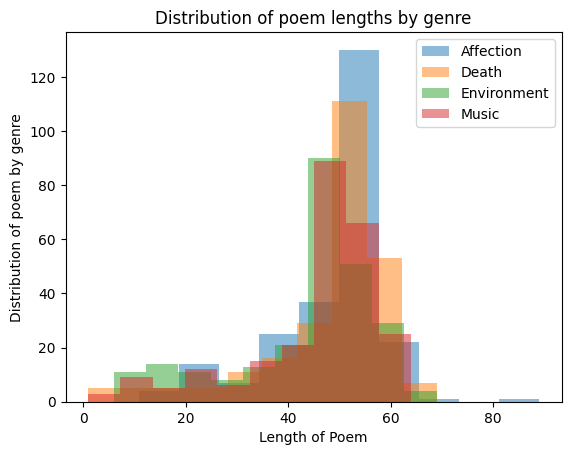

In [18]:
df.groupby('Genre')['length'].plot(kind='hist',alpha=0.5,legend=True)
plt.xlabel('Length of Poem')
plt.ylabel('Distribution of poem by genre')
plt.title('Distribution of poem lengths by genre')
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

#identifying and plotting top 20 most frequent bigrams , classifying into positive and negative

In [20]:
#Split positive and negative classes

pos_texts = df[df['Genre'].isin(['Affection','Music'])]['Poem']
neg_texts = df[df['Genre'].isin(['Death','Environment'])]['Poem']

<Figure size 1000x600 with 0 Axes>

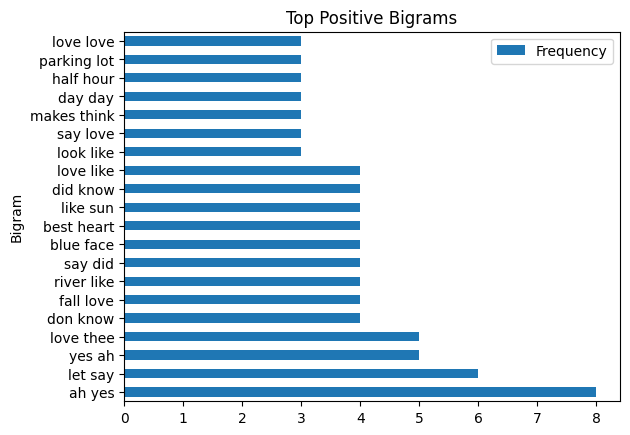

<Figure size 1000x600 with 0 Axes>

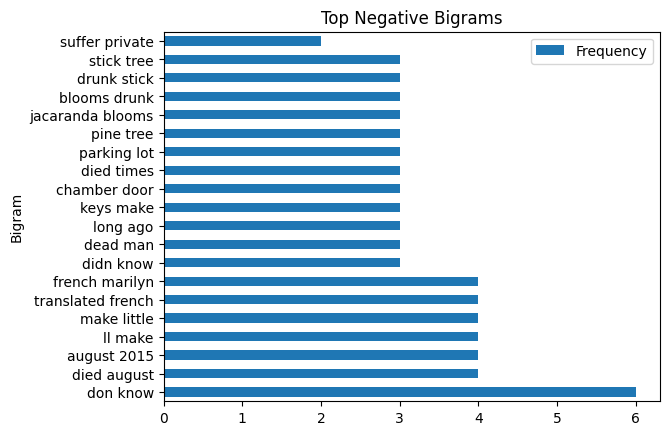

In [23]:
#Function to get top bigrams

def top_20_bigrams(texts,n=20):
  # Fill NaN values with empty strings
  texts = texts.fillna('')
  vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(texts)
  bag_of_words = vec.transform(texts)
  sum_of_words = bag_of_words.sum(axis=0)
  word_freq = [(word,sum_of_words[0,idx])for word , idx in vec.vocabulary_.items()]
  return sorted(word_freq, key=lambda x: x[1], reverse=True)[:n]


top_pos = top_20_bigrams(pos_texts)
top_neg = top_20_bigrams(neg_texts)

pos_df = pd.DataFrame(top_pos,columns=['Bigram','Frequency'])
neg_df = pd.DataFrame(top_neg,columns=['Bigram','Frequency'])


plt.figure(figsize=(10,6))
pos_df.sort_values(by='Frequency',ascending=False).plot(x='Bigram',y='Frequency',kind='barh',title='Top Positive Bigrams')
plt.show()

plt.figure(figsize=(10,6))
neg_df.sort_values(by='Frequency',ascending=False).plot(x='Bigram',y='Frequency',kind='barh',title='Top Negative Bigrams')
plt.show()

In [28]:
import re
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


# --- (i) Basic Cleaning ---
def clean_text(text):
    # Convert non-string inputs to string
    text = str(text)
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove numbers & special chars
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

# Before/After example
print("Before:", df['Poem'].iloc[0])
print("After:", clean_text(df['Poem'].iloc[0]))

# --- (ii) Tokenization + Lemmatization ---
lemmatizer = WordNetLemmatizer()

def tokenize_lemmatize(text):
    tokens = word_tokenize(text)  # tokenization
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

# Apply on 5 random samples
samples = df['Poem'].sample(5, random_state=42)
for i, s in enumerate(samples):
    print(f"\nSample {i+1}:")
    print("Original:", s)
    print("Processed:", tokenize_lemmatize(clean_text(s)))

Before: nan
After: nan

Sample 1:
Original: What is it you feel I asked Kurt when you listen toRavel’s String Quartet in F-major, his face was so lit upand I wondered, “the music is unlike the world I liveor think in, it’s from somewhere else, unfamiliar and unknown,not because it is relevant to the familiar and comfortable,but
Processed: ['what', 'is', 'it', 'you', 'feel', 'i', 'asked', 'kurt', 'when', 'you', 'listen', 'toravels', 'string', 'quartet', 'in', 'fmajor', 'his', 'face', 'wa', 'so', 'lit', 'upand', 'i', 'wondered', 'the', 'music', 'is', 'unlike', 'the', 'world', 'i', 'liveor', 'think', 'in', 'it', 'from', 'somewhere', 'else', 'unfamiliar', 'and', 'unknownnot', 'because', 'it', 'is', 'relevant', 'to', 'the', 'familiar', 'and', 'comfortablebut']

Sample 2:
Original: I have been a spendthrift Dropping from lazy fingers Quiet coloured hours, Fluttering away from me Like oak and beech leaves in October.I have lived keenly and wastefully, Like a bush or a sun insect— Lived sensua

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
